# Introduction

In this notebook, I will look at 200 Pitchfork music reviews and try to predict if an album is considered good (above 6.5 is 1) or bad (below 6.5 is 0). I will be creating a Bag of Words model in order to be used on my classification machine learning models.
Before I get to predicting though, I will convert the scores of these records to binary, and then convert the csv to a tsv in order to avoid the computer confusing a comma as a way to identify the end of a column.

In [117]:
import pandas as pd
import numpy as np

df = pd.read_csv("reviews.csv")

df.head()

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
0,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,1,prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,2,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club
3,22661,4,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,22661,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,"kleenex, liliput"
4,22725,8,new start,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,22725,It is impossible to consider a given release b...,electronic,teklife,taso


Since we are working with a rather large data set, with each row having its own unique and lenghty review, we will look at the first 100 reviews that appear on this data set.

In [118]:
new = df[['artist', 'title', 'content', 'score']].copy()
data=new.head(200)
data[data['score'] == 6.3] #This is to double check if the next cell will be correct

,artist,title,content,score
21,nine inch nails,not the actual events ep,Nine Inch Nails mastermind Trent Reznor has sp...,6.3
69,alex izenberg,harlequin,Los Angeles songwriter Alex Izenberg describes...,6.3
133,j.g. biberkopf,ecologies ii: ecosystems of excess,Jacques Gaspard Biberkopf makes music for turb...,6.3
163,tim buckley,"lady, give me your key: the unissued 1967 solo...",While their recorded output was inversely prop...,6.3


The last line on the cell above is used to check which albums are scored lower than a 6.5. I'm going to change all the scores to binary, with scores > 6.5 equalling to 1 and scores < 6.5 equalling to 0. So once I change the data frame, I'm going to double check to see if these albums will succefully turn from 6.3 to 0.

#### Replacing all scores with either positive (>6.5) or negative (<6.5)

In [119]:
data['score'].values[data['score'] >= 6.5] = 1
data['score'].values[(data['score'] < 6.5) & (data['score'] != 1)] = 0
data

,artist,title,content,score
0,massive attack,mezzanine,"“Trip-hop” eventually became a ’90s punchline,...",1.0
1,krallice,prelapsarian,"Eight years, five albums, and two EPs in, the ...",1.0
2,uranium club,all of them naturals,Minneapolis’ Uranium Club seem to revel in bei...,1.0
3,"kleenex, liliput",first songs,Kleenex began with a crash. It transpired one ...,1.0
4,taso,new start,It is impossible to consider a given release b...,1.0
...,...,...,...,...
195,lambchop,flotus,Over the course of Lambchop’s two decade-plus ...,1.0
196,roman flgel,all the right noises,Roman Flügel has released hundreds of tracks o...,1.0
197,dj rude one,onederful,As one-half of Single Minded Pros alongside Do...,1.0
198,syrinx,tumblers from the vault (19701972),"On the same freezing February day in 1968, Wen...",1.0


In [120]:
data[data['artist'] == 'nine inch nails']

,artist,title,content,score
21,nine inch nails,not the actual events ep,Nine Inch Nails mastermind Trent Reznor has sp...,0.0


It worked! Now let's export this data frame to a csv, and then convert it to a tsv on the numbers application (done outside of this notebook) and load it.
A tsv is desired here because the reviews themselves have commas in them, so a csv would intepret those commas as the end of a column. This is not desired, and having tab delimited columns would fix this issue.

In [121]:
export_csv = data.to_csv('binary_reviews.csv', index=None, header=True)

In [122]:
dataset = pd.read_csv('binary_reviews.tsv', delimiter='\t', quoting=3)

In [ ]:
export_csv = data.to_csv('binary_reviews_long.csv', index=None, header=True)

In [123]:
dataset2 = pd.read_csv('binary_reviews_long.tsv', delimiter='\t', quoting=3)
dataset2[dataset2['score'] == 0]

,artist,title,content,score
9,the lox,filthy america its beautiful,"""There were innumerable cameos at the Bad Boy ...",0.0
13,yasiin bey,december 99th,"""In January 2016, rapper/actor Yasiin Bey anno...",0.0
21,nine inch nails,not the actual events ep,"""Nine Inch Nails mastermind Trent Reznor has s...",0.0
29,ab-soul,do what thou wilt.,"""Occultist and ceremonial magician Aleister Cr...",0.0
35,hodgy,fireplace: thenottheotherside,"""Technically, Fireplace: TheNotTheOtherSide is...",0.0
37,a-trak,in the loop: a decade of remixes,"""“Making a song from alpha to omega is challen...",0.0
39,kevin abstract,american boyfriend: a suburban love story,"""Kevin Abstract just happens to rap; in anothe...",0.0
41,deadmau5,w:/2016album/,"""There aren’t many electronic dance musicians ...",0.0
45,post malone,stoney,"""“White Iverson” is not a foundational brick; ...",0.0
54,various artists,the hamilton mixtape,"""The Hamilton original cast recording recently...",0.0


### Cleaning the texts

In [124]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 200):
    review = re.sub('[^a-zA-Z]', ' ', dataset2['content'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #^Here, I am taking all the words in the review that are not in the stopwords list.
    #I'm using a set rather than a list because it will be faster for our algorithm.
    review = ' '.join(review)
    #^Joining back the different words in the review list to turn them back into a string.
    #We use ' ' to separate all the words in the review.
    corpus.append(review)

### Creating the Bag of Words Model

Take all the unique words in the reviews. We will then have a table where the rows correspond to the reviews and the columns correspond each of the different words that are in the corpus.

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#Our features, fit on our corpus and then transform to put all diff words to its own column.
X = cv.fit_transform(corpus).toarray()
print("Matrix: \n", X)
print("dimension: ", X.shape)

Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
dimension:  (200, 12522)


X is a sparse matrix. Here we see that there are 12522 columns, meaning there were 12522 unique words. We can filter the non-relevant words by only taking the n most frequent words. We do this to reduce sparsity and to train our algorithm to make better correlations between the words in the review and the outcome of the review.

max_featuresint or None, default=None:
If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
In other words, max_features=n will return the words that appear n times or more.

Creating a feature matrix out of words that appear n times or more...

In [129]:
cv = CountVectorizer(ngram_range=(1, 1), max_features=100)
cv_fit = cv.fit_transform(corpus)#.toarray()

To double check if the words were indeed coming up more than n times, we can display the two arrays as a dictionary that consists of words and their counts.

In [130]:
a = cv.get_feature_names()
b = cv_fit.toarray().sum(axis=0)

res = {a[i]: b[i] for i in range(len(a))} 
res

{'album': 720,
 'also': 220,
 'alway': 110,
 'around': 106,
 'artist': 141,
 'back': 201,
 'band': 362,
 'beat': 135,
 'best': 115,
 'black': 133,
 'call': 118,
 'come': 219,
 'could': 157,
 'day': 109,
 'drum': 104,
 'earli': 124,
 'end': 133,
 'even': 348,
 'featur': 102,
 'feel': 310,
 'find': 111,
 'first': 272,
 'get': 181,
 'go': 167,
 'good': 103,
 'group': 116,
 'guitar': 183,
 'instrument': 117,
 'know': 123,
 'last': 125,
 'less': 110,
 'life': 111,
 'like': 909,
 'line': 135,
 'listen': 163,
 'live': 163,
 'long': 145,
 'love': 152,
 'lyric': 115,
 'made': 129,
 'make': 284,
 'mani': 119,
 'might': 135,
 'minut': 157,
 'moment': 130,
 'much': 204,
 'music': 614,
 'name': 107,
 'never': 156,
 'new': 344,
 'often': 121,
 'old': 105,
 'one': 506,
 'open': 184,
 'part': 116,
 'perform': 137,
 'piec': 142,
 'play': 224,
 'point': 120,
 'pop': 176,
 'produc': 158,
 'product': 113,
 'project': 111,
 'punk': 119,
 'rap': 141,
 'record': 494,
 'releas': 264,
 'rock': 166,
 'seem': 15

After playing around with the max_feature argument, its best to use max_feature=100, since there are no words that appear less than 100 times on this setting. Previously, I set max_feature to 110 and their were words appearing less than 110 times, so I had to cut those words out by using an optimal smaller number.

In [131]:
X = cv_fit.toarray()
print("Matrix: \n", X)
print("dimension: ", X.shape)

Matrix: 
 [[11  1  1 ...  1  6  0]
 [ 7  0  0 ...  0  1  0]
 [ 0  1  0 ...  0  1  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 2  2  0 ...  1  2  0]
 [ 0  2  0 ...  1  0  0]]
dimension:  (200, 100)


In [132]:
y = dataset2.iloc[:, 3].values
y.shape

(200,)

### Build Our Model

Now this is just a classification problem! The most common techniques used for NLP are Naive Bayes, Decision Tree, and Random Forest. Let's see the perfomance of these three and pick the best one.

### Naive Bayes

In [133]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=0)

#Fitting to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Predicting the test set results
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Confusion Matrix: 



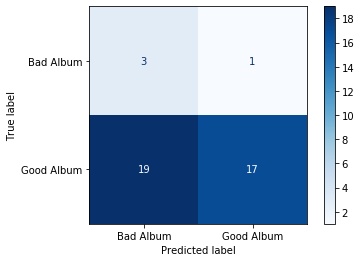

In [137]:
from sklearn.metrics import plot_confusion_matrix
class_names = dataset.score
print("Confusion Matrix: \n")
_=plot_confusion_matrix(classifier, X_test, y_test, display_labels = ['Bad Album', 'Good Album'], cmap=plt.cm.Blues)

In [138]:
#Manual Calculations
ac = (17 + 3)/(17+3+1+19)
print("Accuracy: ", ac)

pr = (17/(17+1))
print("Precision: ", round(pr, 2))

re = (17/(17+19))
print("Recall: ", re)

fs = (2*pr*re)/(pr+re)
print("F1 Score: ", fs)

Accuracy:  0.5
Precision:  0.94
Recall:  0.4722222222222222
F1 Score:  0.6296296296296297


In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.5
Precision:  0.9444444444444444
Recall:  0.4722222222222222
F1 Score:  0.6296296296296297


In [140]:
#Or we can use this function to make things quicker
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.14      0.75      0.23         4
         1.0       0.94      0.47      0.63        36

    accuracy                           0.50        40
   macro avg       0.54      0.61      0.43        40
weighted avg       0.86      0.50      0.59        40



All the scores match! Great, now to make things quicker for the other model measurements, we will stick with the classification_report function.

### Decision Tree Classification

In [148]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Confusion Matrix: 



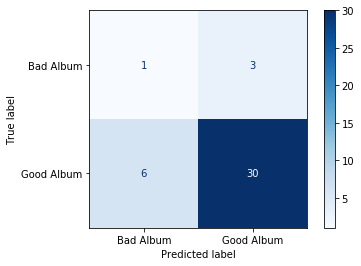

In [149]:
class_names = dataset.score
print("Confusion Matrix: \n")
_=plot_confusion_matrix(classifier, X_test, y_test, display_labels = ['Bad Album', 'Good Album'], cmap=plt.cm.Blues)

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.14      0.25      0.18         4
         1.0       0.91      0.83      0.87        36

    accuracy                           0.78        40
   macro avg       0.53      0.54      0.53        40
weighted avg       0.83      0.78      0.80        40



### Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Confusion Matrix: 



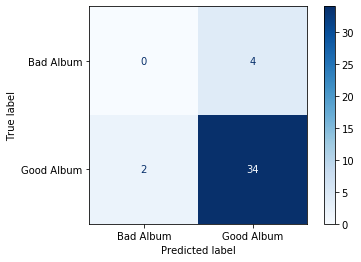

In [155]:
class_names = dataset.score
print("Confusion Matrix: \n")
_=plot_confusion_matrix(classifier, X_test, y_test, display_labels = ['Bad Album', 'Good Album'], cmap=plt.cm.Blues)

In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.89      0.94      0.92        36

    accuracy                           0.85        40
   macro avg       0.45      0.47      0.46        40
weighted avg       0.81      0.85      0.83        40



# Conclusion

Looks like the Random Forest Classifier performed best out of these three models! The only category in which Random Forest does a little worse is Precision, where the sample elements are a little less precise than the other two models.
So by creating a Bag of Words and then running a Random Forest Classification algorithm on it, we can predict whether or not an album will be good (scoring more than 6.5) or bad (scoring less than 6.5) with 85% Accuracy!